In [3]:
import numpy as np
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

In [12]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "sans-serif"

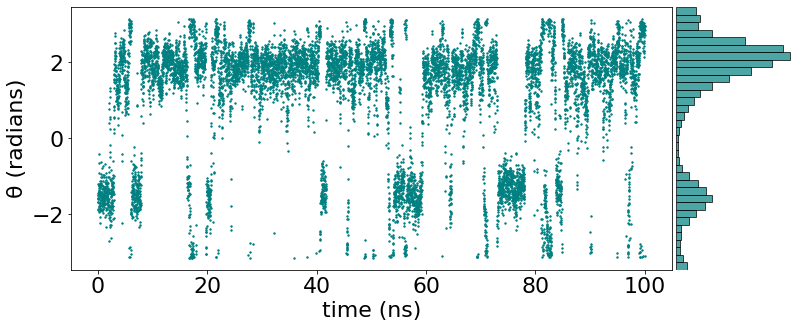

In [13]:
x_data, y_data = Read_Two_Column_File('../data/lig_orientational_dihedral/ori_dihe.dat')
y_data = [dat * np.pi/180 for dat in y_data]

fig, ax = plt.subplots(figsize=(13, 5))
ax.scatter(np.divide(x_data,100), y_data, s=2, color = 'teal')
ax.set_ylabel('θ (radians)')
ax.set_xlabel('time (ns)')

# Create a divider for the right subplot
divider = make_axes_locatable(ax)
cax_right = divider.append_axes("right", size="20%", pad=0.05)

# Plot histogram on the right side
cax_right.hist(y_data[:20000], orientation='horizontal', bins=35, alpha=0.7, color='teal', edgecolor='black')

# Adjust histogram bar positions
cax_right.set_ylim(min(y_data[:20000]), max(y_data[:20000]))
cax_right.spines["left"].set_visible(False)
cax_right.spines["right"].set_visible(False)
cax_right.spines["top"].set_visible(False)
cax_right.spines["bottom"].set_visible(False)
cax_right.yaxis.set_ticks([])
cax_right.xaxis.set_ticks([])

# Adjust the layout to leave more space at the bottom
plt.subplots_adjust(bottom=0.15)

plt.savefig("ori_angle_no_rests.png")
plt.show()

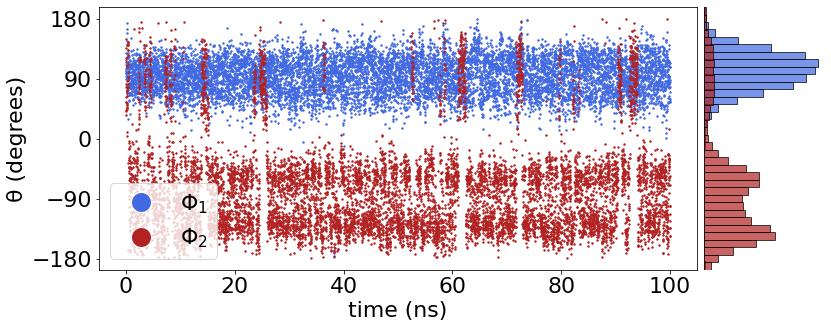

In [14]:

# Assuming the function Read_Two_Column_File is defined elsewhere
# For the sake of demonstration, I'll use random data for x_data and y_data

# Start by setting up the figure and main scatter plot axis
fig, ax = plt.subplots(figsize=(13, 5))

# Load and plot the data from phosdihe1.dat
x_data, y_data = Read_Two_Column_File('../data/phosphate_dihedrals/dihe2.dat')
y_data = [dat * -1 for dat in y_data]
# Plot every 5th data point
ax.scatter(np.divide(x_data[::5], 500), y_data[::5], s=2, color='royalblue', label='Phi 1')

# ... (rest of the code for the second dataset)

# Add the legend to the scatter plot
ax.legend(loc='upper right')

# Create divider and histogram for phosdihe1.dat
divider = make_axes_locatable(ax)
cax_right = divider.append_axes("right", size="20%", pad=0.1)  # Adjust pad value
cax_right.hist(y_data[:20000], orientation='horizontal', bins=35, alpha=0.7, color='royalblue', edgecolor='black', label = 'Φ2')

# For the second dataset
x_data, y_data = Read_Two_Column_File('../data/phosphate_dihedrals/dihe1.dat')
y_data = [dat * -1 for dat in y_data]
# Plot every 5th data point
ax.scatter(np.divide(x_data[::5], 500), y_data[::5], s=2, color='firebrick', label='Phi 2')
ax.legend(loc='upper right')

# Add histogram for phosdihe2.dat

cax_right.hist(y_data[:20000], orientation='horizontal', bins=35, alpha=0.7, color='firebrick', edgecolor='black', label = 'Φ1')

# Adjust properties
#ax.set_ylim(-np.pi, np.pi)
ax.set_yticks([-180,-90, 0, 90, 180])
ax.set_ylabel('θ (degrees)')
ax.set_xlabel('time (ns)')
cax_right.set_ylim(-180,180)
cax_right.spines["left"].set_visible(False)
cax_right.spines["right"].set_visible(False)
cax_right.spines["top"].set_visible(False)
cax_right.spines["bottom"].set_visible(False)
cax_right.yaxis.set_ticks([])
cax_right.xaxis.set_ticks([])

# Adjust the layout
plt.subplots_adjust(bottom=0.15)

# Move both the scatter plot and histogram to the right
new_pos_ax = ax.get_position()
new_pos_cax = cax_right.get_position()
new_pos_ax.x0 += 0.06  # Adjust this value to move the plot further right
new_pos_ax.x1 += 0.06
new_pos_cax.x0 += 0.06
new_pos_cax.x1 += 0.06

ax.set_position(new_pos_ax)
cax_right.set_position(new_pos_cax)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='royalblue', markersize=20, label='$\Phi_1$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='firebrick', markersize=20, label='$\Phi_2$')]

# Add the custom legend to the scatter plot
ax.legend(handles=legend_elements, loc='lower left')

#plt.legend(loc='upper left')
# Save and show the combined plot
#plt.ylim(-np.pi, np.pi)
plt.savefig("phos_angles100ns_w_boresch.png")
plt.show()



# ... [code for the second dataset]

